# Ch. 4 - Numerical Differentiation and Integration

## Section 4.1 Numerical Differentiation

So far, we have talked a lot about floating point number representations and the related source of error: __Roundoff__

Now we are ready to use the next major tool in our toolkit: __Taylor series approximations__

When we deal with differentiation and integration, we are talking about the basic operations of calculus, so we start with the definition of the derivative we learned in calculus:

$$\frac{d f(t)}{dt} = \lim_{\Delta t\to 0} \frac{f(t+\Delta t)-f(t)}{\Delta t}$$

Based on what we have discussed so far, it should be clear that in the computational setting we cannot really perform a limit as something goes to zero because we can only represent a finite number gamut and it does not include arbitrarily small quantities.

The feasible alternative is to compute and approximation of the limit, and that almost always involves Taylor series:

$$f(t+\Delta t) = f(t)+\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{dt^2}+\frac{\Delta t^3}{3!} \frac{d^3f(c_1)}{dt^3}$$

$$f(t-\Delta t) = f(t)-\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{dt^2}-\frac{\Delta t^3}{3!} \frac{d^3f(c_2)}{dt^3}$$

where $c_1\in[t,t+\Delta t]$ and $c_2\in[t-\Delta t,t]$.

Subtracting the expressions gives:

$$f(t+\Delta t) - f(t-\Delta t) = 2\Delta t\frac{df(t)}{dt}+\frac{\Delta t^3}{3!} \big( \frac{d^3f(c_1)}{dt^3}+\frac{d^3f(c_2)}{dt^3} \big)$$

We can solve to obtain an estimate of the derivative of a function based on values of the function at a specified set of points:

$$ \frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t-\Delta t)}{2\Delta t} - \frac{\Delta t^3}{3!} \frac{d^3f(c)}{dt^3}$$ 
where $$f'''(c) = f'''(c_1)+f'''(c_2)$$

We now have a __$2^{nd}$ order accurate central difference operator__ to estimate the first derivative.

__central difference__ $\iff$ __finite difference__ operator evaluates $f$ at locastions symmetrically left and right of $t$

__$2^{nd}$ order accurate__ $\iff$ error term is $\sim \Delta t^2$

There are whole families of forward, backward, and centered difference estimators for derivatives of various orders.

For example, a $1^{st}$ order forward difference first derivative estimator can be obtained directly from our first Taylor series above:

$$\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t)}{\Delta t} + O(\Delta t^2)$$

To see how a central difference estimator would be constructed for a higher order derivative, add the Taylor series above (canceling odd powers):
$$f(t+\Delta t) + f(t-\Delta t) = 2 f(t)+\Delta t^2 \frac{d^2f(t)}{dt^2}+ O(\Delta t^4)$$

Moving the $2f(t)$ to the left side and dividing by $\Delta t^2$ gives a $2^{nd}$ order accurate estimate of the second derivative:
$$\frac{d^2f(t)}{dt^2} = \frac{f(t+\Delta t) -2 f(t) + f(t-\Delta t)}{\Delta t^2} + O(\Delta t^2)$$

In typical usage, we employ a truncated finite difference operator and incur a __truncation error__ associated with the terms in the series that have been omitted.

The omitted terms are $O(\Delta t^n)$ and become smaller as we use a finer discretization (smaller values of $\Delta t$).

But when we evaluate the function as specified in the derivative estimate, we perform floating point operations and incur __roundoff errors__.

The relative error due to roundoff, $\epsilon_r$, starts (and hopefully stays) on the order of machine epsilon. It does not continue to get smaller as we reduce $\Delta t$.

A major practical question then arises: How to handle the tradeoff between truncation error and roundoff error?

Clearly, we do not want $\Delta t \sim O(1)$, because the neglected terms in the series may not get small, and <br>we do not want $\Delta t \sim O(\epsilon_M)$ because when we estimate derivatives for $t\sim O(1)$, $t+\Delta t)$ becomes indistinguishable from $t$ and the finite difference formulas produce some combination of outright failure and catastrophic cancellation.

## Implement derivative estimates and illustrate how error depends on spacing

Note that this has been modified from class to consider derivatives of $sin(t)$ near $t=\frac{\pi}{3}$.

The cell below defines the central difference estimate for the first derivative with truncation error $O(\Delta t^2)$.

In [114]:
import numpy as np

#define function for central difference estimate of 1st derivative
def d1(f,t,h):
    return (f(t+h)-f(t-h))/(2*h)

Below we define the function of interest $sin(t)$, the evaluation point $t=\pi/3$, and the limit on the magnitude of the exponent $n=14$ so that we will consider `h=[1e0, 1e-1, 1e-2, ... , 1e-12, 1e-13]`. The loop computes the value of 'h', the finite difference estimate, and the absolute error and prints the values for inspection. The following cell plots the computed values of spacing and the associated errors.

In [120]:
f = np.sin  #function to consider
t = np.pi/3 #evaluation point
exact = np.cos(t) #exact derivative value
n = 14 #maximum exponent of h
e_vals1 = np.zeros(n) #initialize array to store error values
print("  h   Absolute Error")
for i in range(0,n):
    h = 10.**(-i)
    est =  d1(f,t,h)
    error = np.abs(exact-est)
    e_vals1[i] = error
    print('{:1.0e} {: 1.9f}'.format(h,e_vals1[i]))  

  h   Absolute Error
1e+00  0.079264508
1e-01  0.000832917
1e-02  0.000008333
1e-03  0.000000083
1e-04  0.000000001
1e-05  0.000000000
1e-06  0.000000000
1e-07  0.000000000
1e-08  0.000000003
1e-09  0.000000041
1e-10  0.000000041
1e-11  0.000000041
1e-12  0.000044450
1e-13  0.000399639


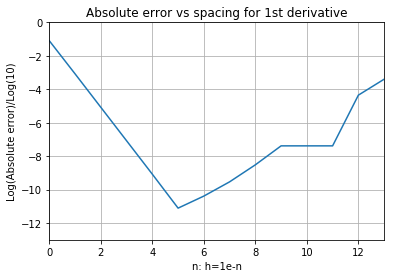

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt # import matplotlib's pyplot function under the abbreviation plt

plt.plot(np.log(e_vals1)/np.log(10)) 
plt.axis([0,13,-13,0])
plt.title("Absolute error vs spacing for 1st derivative")
plt.xlabel('n: h=1e-n')
plt.ylabel('Log(Absolute error)/Log(10)')
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

We see that the error in the first derivative estimate initially decreases as $h$ decreases from `1e0` to `1e-5`. Note that the slope in this region is very close to $(-11-(-1))/5) \approx 2$ indicating absolute error $\sim h^{-2}$ consistent with error being dominated by truncation.

As $h$ decreases beyond `1e-5`, the absolute error grows indicating that roundoff error becomes significant and eventually dominant.

Now let's consider what happens with central difference estimate for the $2^{nd}$ derivative.

In [116]:
#define function for central difference estimate of 2nd derivative
def d2(f,t,h):
    return (f(t+h)-2*f(t)+f(t-h))/(h**2)

f = np.sin  #function to consider
t = np.pi/3 #evaluation point
exact = -np.sin(t) #exact derivative value
n = 14 #maximum exponent of h
e_vals2 = np.zeros(n) #initialize array to store error values
print("  h   Absolute Error")
for i in range(0,n):
    h = 10.**(-i)
    est =  d2(f,t,h)
    error = np.abs(exact-est)
    e_vals2[i] = error
    print('{:1.0e} {: 1.9f}'.format(h,e_vals2[i]))  

  h   Absolute Error
1e+00  0.069805641
1e-01  0.000721447
1e-02  0.000007217
1e-03  0.000000072
1e-04  0.000000003
1e-05  0.000000374
1e-06  0.000051445
1e-07  0.000051445
1e-08  0.866025404
1e-09  0.866025404
1e-10  0.866025404
1e-11  0.866025404
1e-12  0.866025404
1e-13  0.866025404


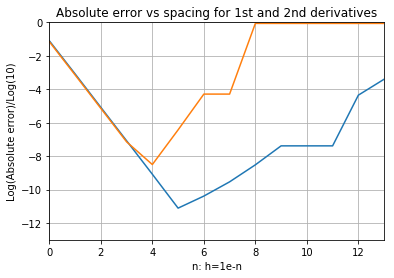

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt # import matplotlib's pyplot function under the abbreviation plt

plt.plot(np.log(e_vals1)/np.log(10))
plt.plot(np.log(e_vals2)/np.log(10)) 
plt.axis([0,13,-13,0])
plt.title("Absolute error vs spacing for 1st and 2nd derivatives")
plt.xlabel('n: h=1e-n')
plt.ylabel('Log(Absolute error)/Log(10)')
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

Here we see that the second derivative estimator exhibits similar behavior: initial linear decrease with slope indicating truncation error $O(\Delta t^2)$ followed by increasing error as roundoff becomes dominant. However, roundoff error becomes significant at a larger value of $h$ for the second derivative. The difference estimator again involves subtraction that leads to cancellation, and the error gets amplified by $h^{-2}$ (instead of just $h^{-1}$ in the first deriative estimator).

These estimators achieve optimal accuracy for spacings on the order of $h \approx 10^{-4} \approx \sqrt[4]{\epsilon_M}$. since machine epsilon is near $10^{-16}$ for double precision arithmetic:

In [127]:
#recall machine epsilon estimate
1.+ 1e-15 == 1, 1.+ 1e-16 == 1

(False, True)

Now compare with a $1^{st}$ derivative estimator with a higher order of accuracy; i.e. with truncation error $\sim O(\Delta t^4)$. This estimator appears as the first entry in Table 4.2:
$$f'(t)=\frac{\big[-f(t+2\Delta t)+8 f(t+\Delta t)-8 f(t-\Delta t) + -f(t-2\Delta t) \big]}{12 \Delta t)}$$

Below we implement the estimator, compute error as a function of $h$, and plot the results for comparison with the previous estimator with truncation error $\sim O(\Delta t^2)$.

In [131]:
#define function for 4th order difference estimate of 1st derivative
def d1_4(f,t,h):
    return (-f(t+2*h)+8*f(t+h)-8*f(t-h)+f(t-2*h))/(12*h)

In [132]:
f = np.sin  #function to consider
t = np.pi/3 #evaluation point
exact = np.cos(t) #exact derivative value
n = 14 #maximum exponent of h
e_vals1_4 = np.zeros(n) #initialize array to store error values
print("  h   Absolute Error")
for i in range(0,n):
    h = 10.**(-i)
    est =  d1_4(f,t,h)
    error = np.abs(exact-est)
    e_vals1_4[i] = error
    print('{:1.0e} {: 1.9f}'.format(h,e_vals1_4[i]))  

  h   Absolute Error
1e+00  0.014794129
1e-01  0.000001665
1e-02  0.000000000
1e-03  0.000000000
1e-04  0.000000000
1e-05  0.000000000
1e-06  0.000000000
1e-07  0.000000001
1e-08  0.000000004
1e-09  0.000000069
1e-10  0.000000226
1e-11  0.000001892
1e-12  0.000072206
1e-13  0.000677195


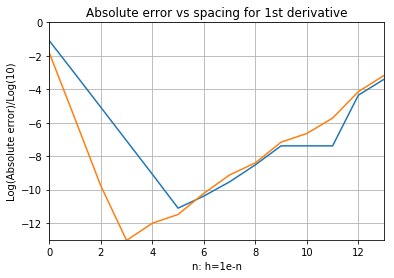

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt # import matplotlib's pyplot function under the abbreviation plt

plt.plot(np.log(e_vals1)/np.log(10)) 
plt.plot(np.log(e_vals1_4)/np.log(10))
plt.axis([0,13,-13,0])
plt.title("Absolute error vs spacing for 1st derivative")
plt.xlabel('n: h=1e-n')
plt.ylabel('Log(Absolute error)/Log(10)')
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

Again the behavior is similar: The error initially decreases according to a power law (which appears linear on a log scale) and then increases as roundoff error becomes significant.

Note that the error for the $4^{th}$ order estimator differs from that of the $2^{nd}$ order estimator in 2 important ways:

1) The initial slope is twice as steep (consistent with error $\sim h^{-4}$).

2) Roundoff error becomes significant at a larger value of $h \approx$ `1e-3`.

## Section 4.2 - Numerical Integration

To provide a practical application for addressing the question of discretization and trading off between truncation and roundoff error, let's move on to consider __numerical integration__ (a.k.a. __numerical quadrature__).

The basic ideas come from the simplest definition of the integral:
$$\int_{a}^{b} f(x) dx = \lim_{h\to 0} \sum\limits_{j=0}^{N} f(x_j) h$$

where $b-a = N h$.

Based on the historical term __quadrature__,  let's use $Q[f]$ as the name for a version of an integration scheme with a small but finite spacing $h$. In the simplest case above, the evaluation points are all equally spaced and all the values are equally weighted, but a more general scheme would have the form:

$$Q[f] = \sum\limits_{j=0}^{N} w_k f(x_k) =  W_0 f(x_0) + w_1 f(x_1) + \ldots + w_N f(x_N)$$ 

and the actual value of the integral is
$$\int_{a}^{b} f(x) dx = Q[f] + E[f]$$

where $E[f]$ is the error in approximating the integral by the quadrature sum.

Note some slight changes of notation: $\Delta t \rightarrow h, t \rightarrow x$ hoping to make the notation look familiar in this context.

Now comes the practical question: How do you choose the evaluation points and weights in a systematic way so that you know something about how the error should behave?

There are several families of popular methods.

A simple and commonly used approach (that you have likely already seen in some form) called __Newton-Cotes__ formulas are based on polynomial interpolation.

We can write uniformly-spaced evaluation points and function values as $$x_k = x_0 + h k, \qquad f_k = f(x_0)$$

Now consider the contribution to the integral from a sequence of adjacent $n+1$ points (starting with $n=1$): 

$$x_0, x_1=x_0 + h \mathrm{\; with \; function \; values \;} f_0, f_1$$

Now approximate the function locally as a polynomial of degree $n = 1$, e.g. a line, and use our major tool (Taylor series) to produce estimate of truncation error:

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \int_{x_0}^{x_0 + h} \big(f_0 + \frac{f_1-f_0}{h} (x-x_0) \big) dx + \int_{x_0}^{x_0 + h} O(x-x_0)^2 dx$$ 

Now integrate the polynomial terms:

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \big(f_0 (x-x_0) + \frac{f_1 - f_0}{2 h}(x-x_0)^2 \big) \Bigr\rvert_{x-x_0 = 0}^h + O((x-x_0)^3)\Bigr\rvert_{x-x_0 = 0}^h$$

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \big(f_0 h + \frac{f_1 - f_0}{2h}h^2 \big) + O(h^3)$$

$$\int_{x_0}^{x_0 + h} f(x) dx = Q[f] + E[f] = \big( h\; \frac{f_0 + f_1}{2} \big) + O(h^3)$$

So the contribution from the interval between adjacent evaluation points is the spacing times the average of the function values which coincides with the area of the trapezoid between the interpolating line and the $x$-axis $\implies$ __trapezoidal rule__

The local error is $O(h^3)$ with a coefficient whose bounds depends on the local maximum of $f''(x)$, so it is reasonable to expect this method to work well on a small interval over which $f'(x)$ does not change much; i.e. the function is locally well-approximated by a linear interpolant.

What do you do if you need to deal with a larger interval (over which the slope changes significantly)?

__Composite method__ $\iff$ break the big interval up into small intervals (where the linear approximant makes sense) and sum the contributions from the small intervals

$$\int_{a}^{b} f(x) dx = \int_{x_0}^{x_N} f(x) dx \sim Q[f] = \sum_{j=0}^{N-1} \frac{h}{2} (f_j + f_{j+1})$$

$$Q[f] = \frac{h}{2} (f_0 + f_1) + \frac{h}{2} (f_0 + f_1) + \frac{h}{2} (f_1 + f_2) + \ldots +  \frac{h}{2} (f_{N-1} + f_N)$$

$$Q[f] = \frac{h}{2} (f_0 + 2 f_1 + 2 f_2 + \ldots + 2 f_{N-1} + f_N)$$

This is the classic formula for uniform spacing.

Let's look at how it works and how the error depends on the spacing. A first implementation might look like the following (which returns a tuple containing the spacing and the quadrature value:

In [286]:
def trap_rule(fun,a,b,n):
    """
    perform trapezoidal rule quadrature
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature subintervals
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    x = np.linspace(a,b,n+1)
    h = (b-a)/n
    f = np.zeros(n+1)
    for i in range (n+1):
        f[i] = fun(x[i])
    quad = 0.5*h*(2*np.sum(f) - f[0] - f[-1])
    return h, quad

Test the `trap_rule` function to compute $\int_a^b sin(t) dt$ for which the exact value is $2$. The 2 test cases below show that integrator works fine for a small number of evaluation points, but LARGE numbers of evaluation points cause a memory fault.

In [288]:
f = np.sin
a = 0.
b = np.pi
exact = 2. #exact integral value of integrating sin(t) on [0,1]

h, quad = trap_rule(f, a,b, 10**2)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h, quad = trap_rule(f, a,b, 10**8)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h =  0.031415926535897934 ; relative error =  8.22480562782113e-05


MemoryError: 

Here is an alternative implementation that accumulates the contributions rather thatn storing them all in an array before summing:

In [289]:
def trap_rule(fun,a,b,n):
    """
    perform trapezoidal rule quadrature
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature subintervals
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    x = a
    h = (b-a)/n
    quad = fun(a) + fun(b)
    for i in range (1,n):
        x += h
        quad += 2*fun(x)
    return h, (h/2)*quad

In [332]:
# Repeat the test cases

h, quad = trap_rule(f, a,b, 10**2)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h, quad = trap_rule(f, a,b, 10**8)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h =  0.031415926535897934 ; relative error =  8.224805627754517e-05
h =  3.141592653589793e-08 ; relative error =  1.778403091456937e-09


So this works, but it gets slow with large number of evaluation points. Again, let's look at how the error depends on the spacing (and/or evaluation point count), but let's also include timing results using `timeit.default_timer`:

In [333]:
from timeit import default_timer as timer

n = 8 #maximum exponent of h
a = 0.
b = np.pi
e_trap = np.zeros(n) #initialize array to store error values
h_vals = np.zeros(n) #initialize array to store spacing values
n_vals = np.zeros(n) #initialize array to store number of points
times = np.zeros(n) #initialize array to store computation times
print("  h      Absolute Error    Time")
for i in range(n):
    m = 10**(i+1)
    start = timer()
    h, est =  trap_rule(np.sin,a,b,m)
    end = timer()
    times[i] = (end - start) # Time in seconds
    error = np.abs(exact-est)
    e_trap[i] = error
    h_vals[i] = h
    n_vals[i] = m+1
    print('{:1.0e} {: 1.14f} {: 1.3e}'.format(h,e_trap[i], times[i]))

  h      Absolute Error    Time
3e-01  0.01647646249055  3.570e-05
3e-02  0.00016449611256  1.181e-04
3e-03  0.00000164493431  1.751e-03
3e-04  0.00000001644963  1.498e-02
3e-05  0.00000000016488  1.343e-01
3e-06  0.00000000000649  9.292e-01
3e-07  0.00000000041355  9.683e+00
3e-08  0.00000000355681  9.855e+01


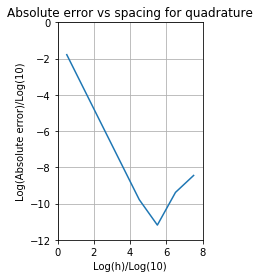

In [334]:
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_trap)/np.log(10)) 
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0) #sets the height to width ratio to 1.5. 
plt.axis([0,8,-12,0])
plt.title("Absolute error vs spacing for quadrature")
plt.xlabel("Log(h)/Log(10)")
plt.ylabel("Log(Absolute error)/Log(10)")
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

Again we see that the error initially shrinks according to a power law.

The initial slope of the log-log plot is $\approx -2$ indicating truncation error $\sim O(h^{2})$. 

How does this match up with Eq.(4.2.6a) giving an error $\sim O(h^{3})$? That is the __local__ error.

With contributions from a number of intervals $\sim O(h^{-1})$, so the global error for the trapezoidal rule is $\sim O(h^{2} h^{-1}) = O(h^{2})$.

Let's also take a look at how the errors matchup with the runtimes.

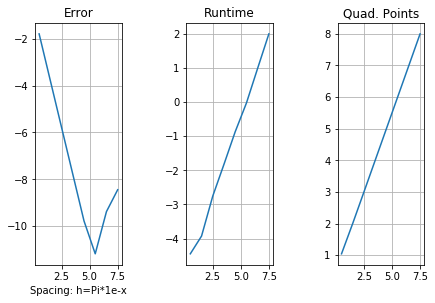

In [335]:
# plot with various axes scales
plt.figure()

# linear
plt.subplot(131)
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_trap)/np.log(10))
plt.yscale('linear')
plt.title('Error')
plt.xlabel('Spacing: h=Pi*1e-x')
plt.grid(True)

# log
plt.subplot(132)
plt.plot(-np.log(h_vals)/np.log(10), np.log(times)/np.log(10))
plt.yscale('linear')
plt.title('Runtime')
plt.grid(True)

# log
plt.subplot(133)
plt.plot(-np.log(h_vals)/np.log(10), np.log(n_vals)/np.log(10))
plt.yscale('linear')
plt.title('Quad. Points')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.95, hspace=0.25,
                    wspace=0.75)

plt.show()

For `h < 1e-5`, in addition to growing errors, we also observe runtimes that are becoming impractical. (For `1e8` points, the trapezoidal rule evaluation took almost 2 minutes.)

What can we do to get more accurate results without spending excessive amounts of time?

There are a couple very standard approaches (higher order quadrature rules and adaptive subdivision), but before we go there let's see if we can squeeze more accuracy out of what we have already done with the trapezoidal rule based on what we know about the truncation error; i.e. the global error is $O(h^{2})$.

Let's call the exact value $F$ and $Q(h)$ the quadrature value with spacing $h$. Then we have: $$F = Q(h) + c_2 h^2 + c_3 h^3 + \ldots$$ 

Similarly we can consider using only every other quadrature point so the spacing is $2h$, for which:$$F = Q(2h) + c_2 (2h)^2 + c_3 (2h)^3 + \ldots$$

Multiplying the first equation by $2^2$ and subtracting, we can cancel out the leading term in the truncation error to obtain:

$$3 F = 4 Q(h) -Q(2h) + O(h^3)$$ or $$F =\frac{ 4 Q(h) -Q(2h)}{3} + O(h^3)$$

Let's test out this idea to see how it works. Let's compute our test integral with 100 intervals and 200 intervals:



In [304]:
#100 panels
h1, est1 =  trap_rule(np.sin,a,b,100)
error1 = np.abs(exact-est1)

#200 panels
h2, est2 =  trap_rule(np.sin,a,b,200)
error2 = np.abs(exact-est2)

print('Errors: {: 1.4e}, {: 1.4e}'.format(error1, error2))

Errors:  1.6450e-04,  4.1124e-05


The absolute errors are in the neighborhood '1e-5'. What happens when we combine them according the formula that aims to cancel out the leading error:

In [305]:
est3 = (4*est2-est1)/3
error3 = np.abs(exact-est3)
print('Combined error: {: 1.4e}'.format(error3))

Combined error:  6.7648e-10


A significant error reduction is obtained without much extra work! This technique is known as Richardson extrapolation, and it is something worth knowing about.

## Return to considering other approaches for error reduction:

### Higher order quadrature methods

We obtained the trapezoidal rule by considering a "panel" consisting of the interval between $n+1=2$ quadrature points and approximating the integrand locally with a polynomial of degree $n=1$.

The Newton-Cotes family of quadrature generalizes this approach by approximating a panel of $n+1$ points with a degree $n$ polynomial.

The next member of the family, approximating 3 points with a degree 2 polynomial (i.e. a quadratic), is known as ___Simpson's rule___:

$$\int_{x_j}^{x_{j+2}} f(x) dx = \frac{3h}{8} (f_j + 4 f_{j+1} + f_{j+2}) - \frac{h^5}{90}f''''(c)$$

The multi-panel version is known as __composite Simpson's rule__:
$$Q_S = \frac{3h}{8} ( f_0 + 4 f_1 + 2 f_2 +4 f_3 +2 f_5 +\ldots+2f_{N-2} +4 f_N-1 + f_N)$$

Below we present an implementation of Simpson's rule and explore how the error depends on spacing.

In [322]:
#implement Simpson's rule
def simpson(f,a,b,n):
    """
    perform trapezoidal rule quadrature
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature panels
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    h = (b-a)/(2*n)
    x = a + h
    quad = f(a) + 4*f(x) + f(b)
    sum = 3
    for i in range (1,n):
        x += h
        quad += 2*f(x)
        x += h
        quad += 4*f(x)
        sum += 2
    return h, (h/3)*quad

In [324]:
# Repeat the test cases to check that things are working reasonably

h, quad = simpson(f, a,b, 10**1)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h, quad = simpson(f, a,b, 10**2)
print("h = ",h, "; relative error = ", np.abs(exact-quad)/exact)

h =  0.15707963267948966 ; relative error =  3.3922209004000337e-06
h =  0.015707963267948967 ; relative error =  3.3824010259309034e-10


Again this works, but it gets slow with large number of evaluation points. Now on to evaluating how error and runtime depend on spacing:

In [337]:
from timeit import default_timer as timer

n = 8 #maximum exponent of h
a = 0.
b = np.pi
e_simp = np.zeros(n) #initialize array to store error values
h_vals = np.zeros(n) #initialize array to store spacing values
n_vals = np.zeros(n) #initialize array to store number of points
times = np.zeros(n) #initialize array to store computation times
print("  h      Absolute Error    Time")
for i in range(n):
    m = 10**(i+1)
    start = timer()
    h, est =  simpson(np.sin,a,b,m)
    end = timer()
    times[i] = (end - start) # Time in seconds
    error = np.abs(exact-est)
    e_simp[i] = error
    h_vals[i] = h
    n_vals[i] = m+1
    print('{:1.0e} {: 1.14f} {: 1.3e}'.format(h,e_simp[i], times[i]))

  h      Absolute Error    Time
2e-01  0.00000678444180  4.910e-05
2e-02  0.00000000067648  1.955e-04
2e-03  0.00000000000016  1.907e-03
2e-04  0.00000000000042  2.414e-02
2e-05  0.00000000000520  2.088e-01
2e-06  0.00000000000793  1.926e+00
2e-07  0.00000000029412  1.956e+01
2e-08  0.00000001031526  2.053e+02


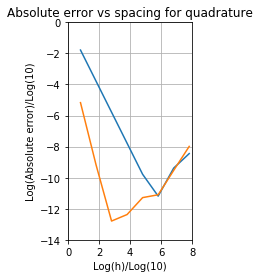

In [338]:
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_trap)/np.log(10)) 
plt.plot(-np.log(h_vals)/np.log(10), np.log(e_simp)/np.log(10)) 
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0) #sets the height to width ratio to 1.5. 
plt.axis([0,8,-14,0])
plt.title("Absolute error vs spacing for quadrature")
plt.xlabel("Log(h)/Log(10)")
plt.ylabel("Log(Absolute error)/Log(10)")
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.show()

The plot above shows the errors for both Trapezoidal rule and Simpson's rule. In the early linear regime both methods become more accurate for smaller spacing. However, the slope for Simpson's rule is approximately -4 associated with its higher order error $\sim O(h^{-4})$. Note that the enhanced truncation error order leads to better accuracy for the same spacing (compared to trapezoidal), but this means that roundoff error begins to dominate sooner (for larger spacing). The optimal spacing for evaluating the test integral with Simpson's rule is $h \approx 10^{-3}$.

There are many other families of quadrature schemes (e.g. Gauss-Kronrod, Clenshaw-Curtis) that employ non-uniform spacings, and you are encouraged to explore further if such things are of interest. We will push on to the next embellishment of the Newton-Cotes methods:

## Adaptive subdivision

Oru quick detour into Richardson extrapolation indicated that we can get an estimate of quadrature error by __downsampling__; i.e. by ignoring every other quadrature point. Thus we obtain $Q(h)$ and $Q(2h)$, and we can use the difference in their values to estimate the error. Adaptive subdivision employs this technique on a panel by panel basis as follows:

To evaluate the integral over an interval to within a specified tolerance:

1) Apply an initial quadrature scheme to obtain an initial estimate $Q_{old}$.
Subdivide each panel and apply the quadrature scheme on the subpanels to obtain $Q_{left}$ and $Q_{right}$.

2) Use $Q_{left} + Q_{right} - Q_{old}$ as a measure of local error for the panel.

3) Continue subdiving panels with largest error until sum of changes due to panel subdivision are less that global error tolerance.

It may be practical to divide up the global error into a local error tolerance that can be applied independently while subdividing the panels.